In [41]:
import numpy as np
import utils
import matplotlib.pyplot as plt
from task2a import pre_process_images
from trainer import BaseTrainer
from task3a import cross_entropy_loss, SoftmaxModel, one_hot_encode
np.random.seed(0)

In [42]:
def calculate_accuracy(X: np.ndarray, targets: np.ndarray, model: SoftmaxModel) -> float:
    """
    Args:
        X: images of shape [batch size, 785]
        targets: labels/targets of each image of shape: [batch size, 10]
        model: model of class SoftmaxModel
    Returns:
        Accuracy (float)
    """
    outputs = model.forward(X)
    target_indices = np.argmax(targets,axis = 1)
    output_indices = np.argmax(outputs,axis = 1) 
     
    correct = outputs.shape[0] - np.count_nonzero(output_indices - target_indices)
    accuracy = correct/X.shape[0]
    return accuracy


In [43]:
class SoftmaxTrainer(BaseTrainer):

    def train_step(self, X_batch: np.ndarray, Y_batch: np.ndarray):
        """
        Perform forward, backward and gradient descent step here.
        The function is called once for every batch (see trainer.py) to perform the train step.
        The function returns the mean loss value which is then automatically logged in our variable self.train_history.

        Args:
            X: one batch of images
            Y: one batch of labels
        Returns:
            loss value (float) on batch
        """
        output = self.model.forward(X_batch)
        self.model.backward(X_batch, output, Y_batch)
        self.model.w -= self.learning_rate * self.model.grad

        loss = cross_entropy_loss(Y_batch, output)
        return loss

    def validation_step(self):
        """
        Perform a validation step to evaluate the model at the current step for the validation set.
        Also calculates the current accuracy of the model on the train set.
        Returns:
            loss (float): cross entropy loss over the whole dataset
            accuracy_ (float): accuracy over the whole dataset
        Returns:
            loss value (float) on batch
        """
        # NO NEED TO CHANGE THIS FUNCTION
        logits = self.model.forward(self.X_val)
        loss = cross_entropy_loss(Y_val, logits)

        accuracy_train = calculate_accuracy(
            X_train, Y_train, self.model)
        accuracy_val = calculate_accuracy(
            X_val, Y_val, self.model)
        return loss, accuracy_train, accuracy_val

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
Final Train Cross Entropy Loss: 0.2800335875350492
Final Validation Cross Entropy Loss: 0.29902402393704086
Final Train accuracy: 0.9225
Final Validation accuracy: 0.9157


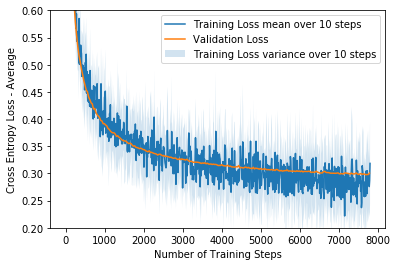

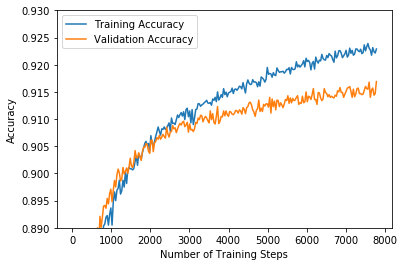

In [44]:
if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    num_epochs = 50
    learning_rate = 0.01
    batch_size = 128
    l2_reg_lambda = 0
    shuffle_dataset = True

    # Load dataset
    X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)
    Y_train = one_hot_encode(Y_train, 10)
    Y_val = one_hot_encode(Y_val, 10)

    # ANY PARTS OF THE CODE BELOW THIS CAN BE CHANGED.

    # Intialize model
    model = SoftmaxModel(l2_reg_lambda)
    # Train model
    trainer = SoftmaxTrainer(
        model, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)

    print("Final Train Cross Entropy Loss:",
          cross_entropy_loss(Y_train, model.forward(X_train)))
    print("Final Validation Cross Entropy Loss:",
          cross_entropy_loss(Y_val, model.forward(X_val)))
    print("Final Train accuracy:", calculate_accuracy(X_train, Y_train, model))
    print("Final Validation accuracy:", calculate_accuracy(X_val, Y_val, model))

    plt.ylim([0.2, .6])
    utils.plot_loss(train_history["loss"],
                    "Training Loss", npoints_to_average=10)
    utils.plot_loss(val_history["loss"], "Validation Loss")
    plt.legend()
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Cross Entropy Loss - Average")
    plt.savefig("task3b_softmax_train_loss.png")
    plt.show()

    # Plot accuracy
    plt.ylim([0.89, .93])
    utils.plot_loss(train_history["accuracy"], "Training Accuracy")
    utils.plot_loss(val_history["accuracy"], "Validation Accuracy")
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("task3b_softmax_train_accuracy.png")
    plt.show()

    # Train a model with L2 regularization (task 4b)



 

### Task 4B

In [45]:
    model1 = SoftmaxModel(l2_reg_lambda=1)
    trainer = SoftmaxTrainer(
        model1, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_reg1, val_history_reg1 = trainer.train(num_epochs)
    # You can finish the rest of task 4 below this point.

    # Plotting of softmax weights (Task 4b)

    weights = np.zeros((28, 280))
    weights_w_reg = np.zeros((28, 280))

    for i in range(10):
        weights[:28, 28*i: 28*(i+1)] = np.reshape(model.w[:784, i], (28, 28))
        weights_w_reg[:28, 28*i: 28*(i+1)] = np.reshape(model1.w[:784, i], (28, 28))

    plt.imsave("task4b_softmax_weight_org.png",
               weights, cmap="gray")
    plt.imsave("task4b_softmax_weight_w_reg.png",
               weights_w_reg, cmap="gray")

Early stopping at epoch 3


### Task 4C

Early stopping at epoch 11
Early stopping at epoch 38


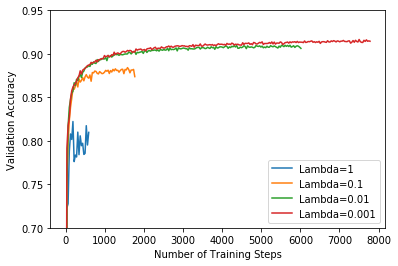

In [49]:
### Lambdha = 0.1

model2 = SoftmaxModel(l2_reg_lambda=0.1)
trainer = SoftmaxTrainer(
    model2, learning_rate, batch_size, shuffle_dataset,
    X_train, Y_train, X_val, Y_val,
)
train_history_reg2, val_history_reg2 = trainer.train(num_epochs)

### Lambdha = 0.01

model3 = SoftmaxModel(l2_reg_lambda=0.01)
trainer = SoftmaxTrainer(
    model3, learning_rate, batch_size, shuffle_dataset,
    X_train, Y_train, X_val, Y_val,
)
train_history_reg3, val_history_reg3 = trainer.train(num_epochs)

### Lambdha = 0.001

model4 = SoftmaxModel(l2_reg_lambda=0.001)
trainer = SoftmaxTrainer(
    model4, learning_rate, batch_size, shuffle_dataset,
    X_train, Y_train, X_val, Y_val,
)
train_history_reg4, val_history_reg4 = trainer.train(num_epochs)

plt.ylim([.7, .95])
utils.plot_loss(val_history_reg1["accuracy"], "Lambda=1")
utils.plot_loss(val_history_reg2["accuracy"], "Lambda=0.1")
utils.plot_loss(val_history_reg3["accuracy"], "Lambda=0.01")
utils.plot_loss(val_history_reg4["accuracy"], "Lambda=0.001")
plt.xlabel("Number of Training Steps")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.savefig("task4c_L2_accuracy.png")
plt.show()





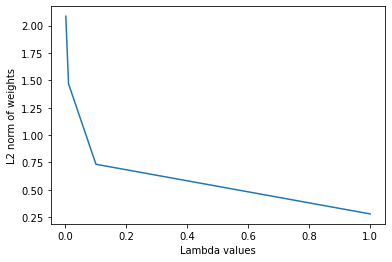

In [47]:
# Task 4d - Plotting of the l2 norm for each weight
l2_lambdas = [1, .1, .01, .001]
l2_norms = [np.linalg.norm(model1.w, 2),
            np.linalg.norm(model2.w, 2),
            np.linalg.norm(model3.w, 2),
            np.linalg.norm(model4.w, 2)]

plt.plot(l2_lambdas, l2_norms)
plt.xlabel("Lambda values")
plt.ylabel("L2 norm of weights")
plt.savefig("task4d_l2_reg_norms.png")
plt.show()